# Preliminaries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Making a dataset from a dummy numpy array

## Making the numpy array and its corresponding dummy labels

In [2]:
features = np.random.rand(5000, 300)

In [3]:
features.shape

(5000, 300)

In [4]:
features[0]

array([0.90136953, 0.06348859, 0.06159283, 0.18199965, 0.17954606,
       0.74194427, 0.57894694, 0.90064302, 0.90226079, 0.21370203,
       0.7819263 , 0.58900411, 0.05948677, 0.07582458, 0.67830591,
       0.62505327, 0.11967253, 0.1650477 , 0.52504186, 0.26713866,
       0.4673237 , 0.14477008, 0.90930924, 0.92958514, 0.98594899,
       0.13427646, 0.80061784, 0.89014718, 0.17473818, 0.30417927,
       0.95843379, 0.03014458, 0.10076691, 0.82742029, 0.79014401,
       0.02021365, 0.83157081, 0.19999249, 0.59537141, 0.45751736,
       0.05082785, 0.46915153, 0.2238731 , 0.23189972, 0.61474027,
       0.75699807, 0.81365162, 0.90481646, 0.24093984, 0.85363846,
       0.63010593, 0.65619332, 0.36010884, 0.916078  , 0.1416988 ,
       0.72081681, 0.10190035, 0.63986408, 0.13382224, 0.21647253,
       0.29047972, 0.66054344, 0.35969325, 0.77052884, 0.36511614,
       0.28624122, 0.05623653, 0.43585028, 0.12525811, 0.88111548,
       0.78047444, 0.64299628, 0.38376601, 0.78678274, 0.82576

In [5]:
labels = np.array([0 if i <= features.shape[0]/2 else 1 for i in range(features.shape[0])])

In [6]:
labels.shape

(5000,)

## Making the dataset object

In [7]:
my_dataset = tf.data.Dataset.from_tensor_slices((features, labels))

In [8]:
type(my_dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

### Applying a mapping on each tensor of the dataset

In [9]:
my_dataset = my_dataset.map(lambda feature_vector, label: (float(feature_vector) * 100.0, label))

In [10]:
type(my_dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

What does it contain now?

In [11]:
#@title As you can see, everything is between 0 and 100 now :)
my_dataset.as_numpy_iterator().next()[0]

array([90.13695   ,  6.3488593 ,  6.159283  , 18.199965  , 17.954605  ,
       74.19443   , 57.894695  , 90.0643    , 90.226074  , 21.370203  ,
       78.19263   , 58.90041   ,  5.9486766 ,  7.582458  , 67.83059   ,
       62.50533   , 11.967253  , 16.50477   , 52.50419   , 26.713865  ,
       46.73237   , 14.477009  , 90.93092   , 92.95852   , 98.594894  ,
       13.427647  , 80.06178   , 89.014725  , 17.473818  , 30.417929  ,
       95.84338   ,  3.014458  , 10.076692  , 82.74203   , 79.014404  ,
        2.0213652 , 83.15708   , 19.999249  , 59.537144  , 45.751736  ,
        5.082785  , 46.915154  , 22.38731   , 23.189972  , 61.474026  ,
       75.69981   , 81.365166  , 90.48164   , 24.093985  , 85.363846  ,
       63.01059   , 65.61933   , 36.010883  , 91.607796  , 14.169879  ,
       72.08168   , 10.190036  , 63.98641   , 13.382223  , 21.647253  ,
       29.047972  , 66.054344  , 35.969326  , 77.05289   , 36.511616  ,
       28.624123  ,  5.623653  , 43.58503   , 12.525812  , 88.11

In [12]:
my_dataset.as_numpy_iterator().next()[1] # the corresponding label

0

## Iterating over the batches

In [13]:
batch_size = 32
my_dataset = my_dataset.batch(batch_size).shuffle(1234) # make the batches and shuffle the data, given the random state 1234

In [14]:
len(my_dataset.as_numpy_iterator().next()[0])

32

In [15]:
idx = 0
for idx, (feature_vector, label) in enumerate(my_dataset):
    if idx > 2:
        break
    print(feature_vector)
    print(label)
    idx += 1

tf.Tensor(
[[20.205008  23.734613  27.618322  ... 83.55936   97.58144   10.811149 ]
 [78.9443    80.42519    8.7394085 ... 88.22514    8.1578665 57.291378 ]
 [89.71674   32.290684  92.743835  ... 91.85562   25.356855  31.04167  ]
 ...
 [29.513     52.108032  17.172453  ... 71.893875  89.86293   96.652756 ]
 [84.8826    65.44328   63.797806  ... 88.506836  46.568523  58.433445 ]
 [70.169655  40.007954  43.22971   ... 65.644424  23.932756  65.12671  ]], shape=(32, 300), dtype=float32)
tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int64)
tf.Tensor(
[[35.192646  60.076595  52.348698  ... 89.4491    19.132204  88.188545 ]
 [74.38932   76.82701   82.82239   ...  2.6398168 95.041115  18.734486 ]
 [47.52146   99.413216  54.221664  ... 18.488335  30.321249  29.034306 ]
 ...
 [81.11542   11.4488535 91.965294  ... 64.189735  95.366196  65.8821   ]
 [57.55254   62.660824  41.365353  ... 49.858387  58.328426  27.839153 ]
 [67.441864  81.26904   81.8

In [16]:
idx = 0
for idx, (feature_vector, label) in enumerate(my_dataset):
    if idx >= 3:
        break
    print(f'feature_vector: {feature_vector.shape}({type(feature_vector)}), label: {label.shape}({type(label)})')
    idx += 1

feature_vector: (32, 300)(<class 'tensorflow.python.framework.ops.EagerTensor'>), label: (32,)(<class 'tensorflow.python.framework.ops.EagerTensor'>)
feature_vector: (32, 300)(<class 'tensorflow.python.framework.ops.EagerTensor'>), label: (32,)(<class 'tensorflow.python.framework.ops.EagerTensor'>)
feature_vector: (32, 300)(<class 'tensorflow.python.framework.ops.EagerTensor'>), label: (32,)(<class 'tensorflow.python.framework.ops.EagerTensor'>)


# Loading the MNIST dataset from the TF library itself

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [18]:
type(x_train)

numpy.ndarray

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

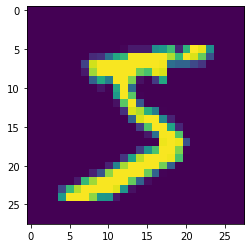

In [21]:
plt.imshow(x_train[0])

In [22]:
y_train[0]

5

In [23]:
x_test.shape

(10000, 28, 28)

In [24]:
y_train.shape

(60000,)

In [25]:
y_test.shape

(10000,)

In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [27]:
train_dataset = train_dataset.map(lambda img, label: (float(img) / 255.0, label))
test_dataset = test_dataset.map(lambda img, label: (float(img) / 255.0, label))

In [28]:
batch_size = 32
train_dataset = train_dataset.batch(batch_size).shuffle(1234)
test_dataset = test_dataset.batch(batch_size).shuffle(1234)

In [30]:
idx = 0
for idx, (img, label) in enumerate(train_dataset):
    if idx >= 3:
        break
    print(f'feature_vector: {img.shape}({type(img)}), label: {label.shape}({type(label)})')
    idx += 1

feature_vector: (32, 28, 28)(<class 'tensorflow.python.framework.ops.EagerTensor'>), label: (32,)(<class 'tensorflow.python.framework.ops.EagerTensor'>)
feature_vector: (32, 28, 28)(<class 'tensorflow.python.framework.ops.EagerTensor'>), label: (32,)(<class 'tensorflow.python.framework.ops.EagerTensor'>)
feature_vector: (32, 28, 28)(<class 'tensorflow.python.framework.ops.EagerTensor'>), label: (32,)(<class 'tensorflow.python.framework.ops.EagerTensor'>)
